# Neural Networks and Large Language Models Workshop
## IEEE at UC San Diego

**Note**: Before you get started, click on **File > Save a copy in Drive** to make a personal copy of this Google Colab notebook.

# Introduction to Neural Networks

Neural Networks are computational models inspired by the human brain's interconnected neuron structure. They are the foundation of deep learning, a subset of machine learning, and are used to solve complex problems like image recognition, natural language processing, and many others.

## Basic Components

**Node (or Neuron)**: The basic unit of computation. Each node takes inputs, applies some function, and passes its output to the next layer.

**Layers**: Neural networks are typically organized in layers. There are three types of layers:

* **Input Layer**: The layer that receives the input from the dataset.
* **Hidden Layer(s)**: Intermediate layer(s) where the computations are performed.
* **Output Layer**: The layer that provides the result.

**Weights**: The parameters that the network learns through training. They represent the strength of the connections between nodes.

**Activation Function**: A function that introduces non-linearity into the network, helping it learn from the error.

![neural](https://miro.medium.com/v2/resize:fit:1400/1*bhFifratH9DjKqMBTeQG5A.gif)

*Credit: [Towards Data Science](https://towardsdatascience.com/everything-you-need-to-know-about-neural-networks-and-backpropagation-machine-learning-made-easy-e5285bc2be3a)*

## Basic Code Example using Keras
Now, let's create a simple neural network using Keras. In this example, we will create a network with one hidden layer to solve a simple binary classification problem.

In [ ]:
# Import necessary libraries
import keras
from keras.models import Sequential
from keras.layers import Dense

# Create the Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(units=10, activation='relu', input_shape=(5,)))  # Hidden Layer with 10 nodes and ReLU activation function
model.add(Dense(units=1, activation='sigmoid'))  # Output Layer with 1 node and Sigmoid activation function

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary to visualize the architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 71 (284.00 Byte)
Trainable params: 71 (284.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In this code:

* We first import the necessary libraries.
* Then we create a Sequential model which is a linear stack of layers.
* We add a hidden layer with 10 nodes and ReLU (Rectified Linear Unit) activation function, and an output layer with 1 node and Sigmoid activation function.
* We then compile the model using the Adam optimizer and Binary Crossentropy loss function which are suitable for a binary classification problem.
* Finally, we print a summary of the model to visualize the architecture.

This basic example should give you a glimpse of how to create and structure a neural network using Keras. In the next part, we would delve deeper into the mathematical foundations that drive the training and functioning of these networks.

## Mathematical Foundations

The essence of training a neural network revolves around minimizing a loss function by adjusting the network's weights. This process is carried out through an algorithm known as backpropagation in conjunction with an optimization algorithm like gradient descent.

### Forward Propagation
Forward propagation is the process of passing the input data through the network, layer by layer, until it reaches the output layer to produce the output.

**Equation:**  $y = f(W\cdot X) + b$, where
* $X$ is the input
* $W$ represents the weights
* $b$ is the bias
* $f$ is the activation function
* $y$ is the output

### Loss Function

The loss function quantifies how well the neural network's predictions match the actual target values.

**Common Loss Functions:**

* Mean Squared Error (MSE) for regression: $\text{MSE} = \frac{1}{N} \Sigma (y_{true} - y_{predicted} )^2$
* Cross-entropy loss for classification: $\text{CE} = -\Sigma y_{true} \log(y_{pred})$

### Backward Propagation

Backpropagation is the process of computing the gradient of the loss function with respect to each weight by applying the chain rule of calculus.

**Gradient Descent Equation:** $W = W - \alpha \nabla_W (\text{Loss})$

Here:

* $\alpha$ is the learning rate
* $\nabla_W$ is the gradient of the loss function with respect to the weights

### Optimization Algorithms

Gradient Descent and its variations like Adam and RMSProp are common optimization algorithms used to minimize the loss function.


## Manual Neural Network Training Example
Let's consider a simple neural network with no hidden layers (a single-layer perceptron) to illustrate the training process manually.

**Dataset**: We'll use a simple toy dataset, where the inputs are 2-bit binary numbers (00, 01, 10, 11), and output is the AND of the 2 bits.

We want to learn a function $y = f(W\cdot X + b)$, where

* $f$ is a sigmoid function, $f(x) = \frac{1}{1 + e^{-x}}$
* $X$ is a vector with 2 entries
* $W$ is an unknown 2x1 vector
* $b$ is an unknown scalar
* $y$ is the output prediction (the XOR of the 2 input bits)

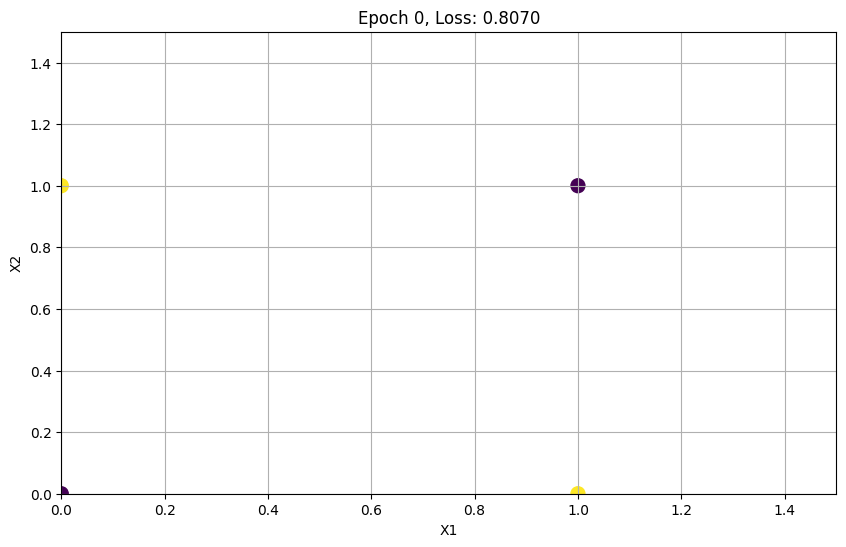

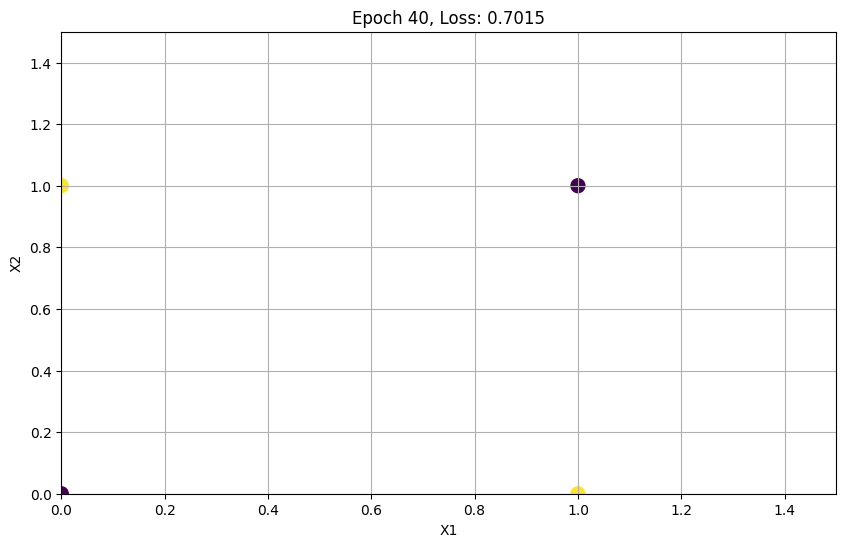

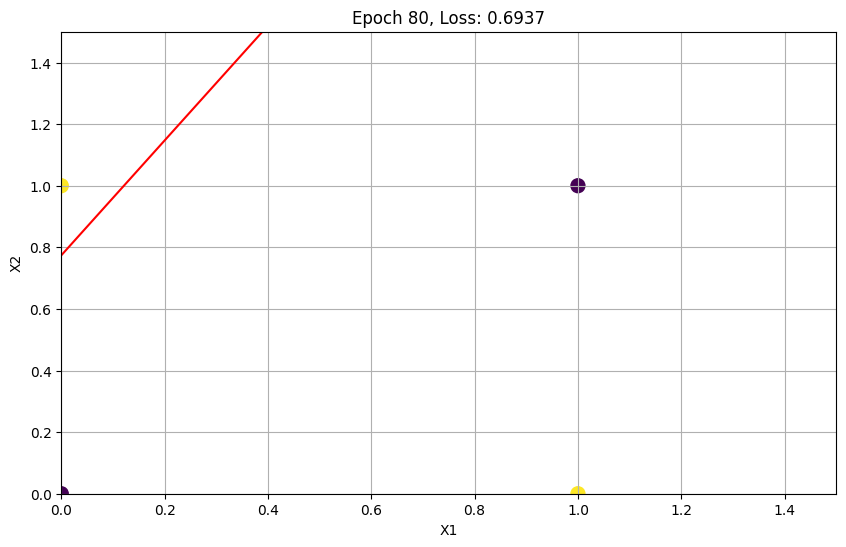

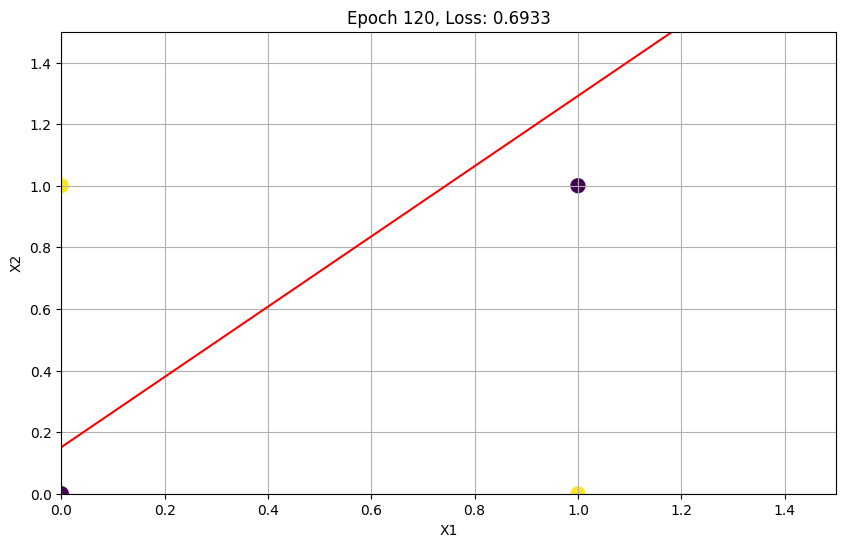

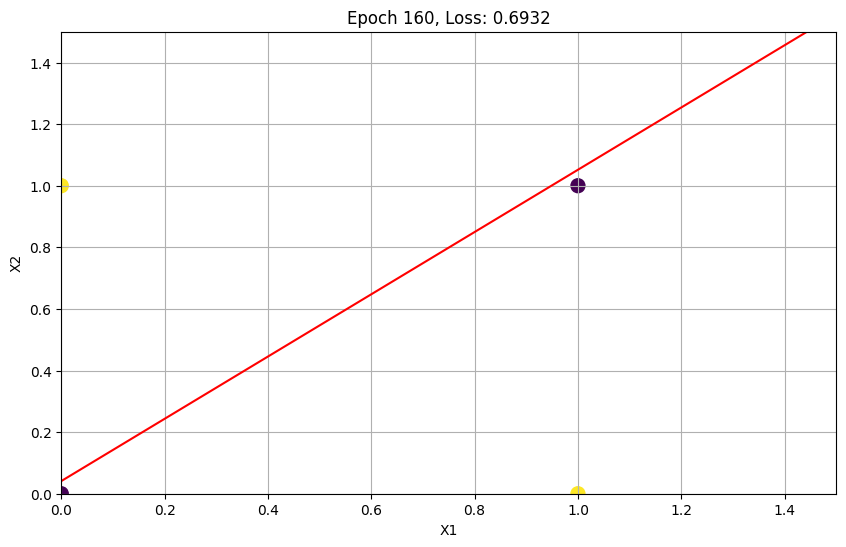

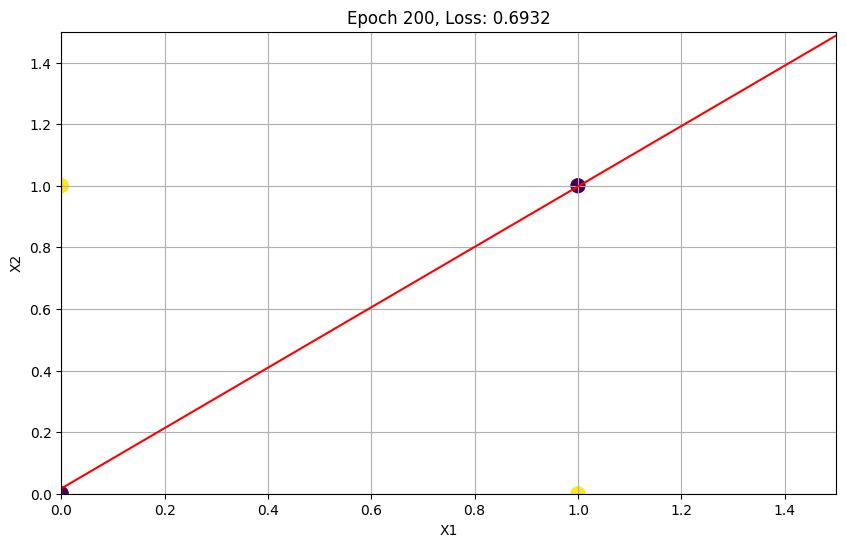

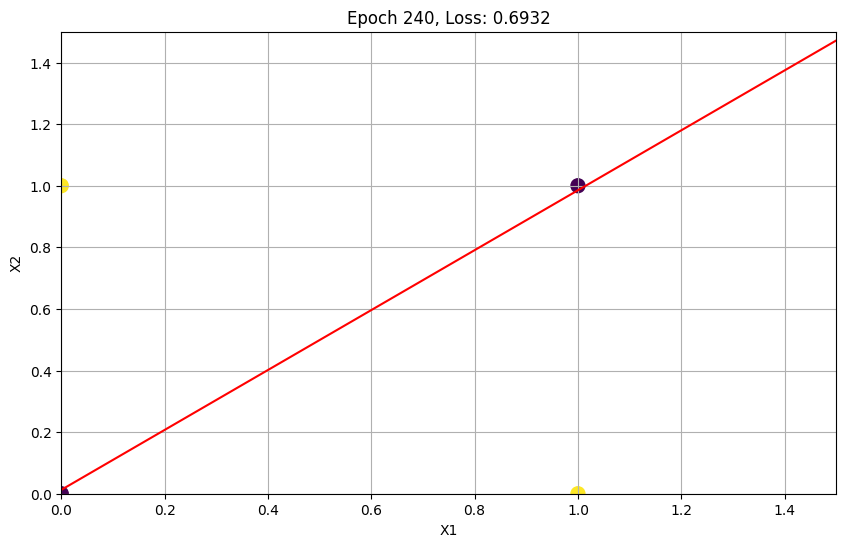

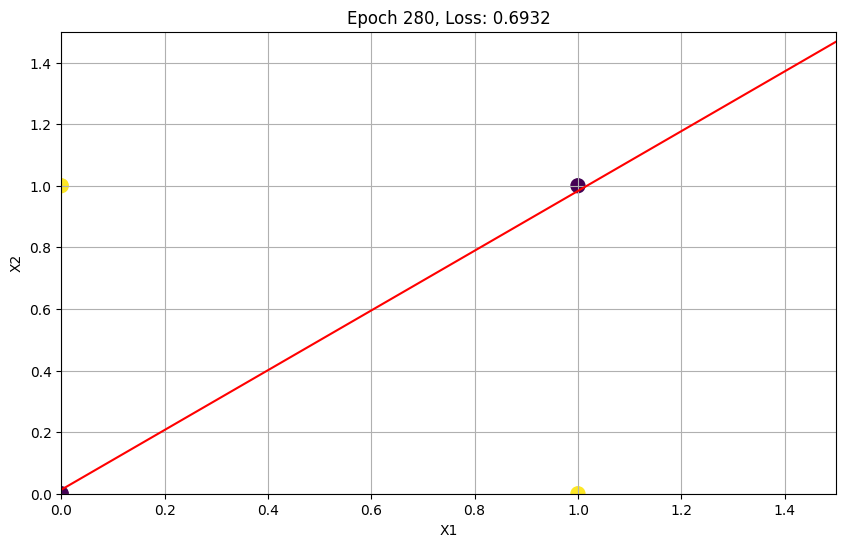

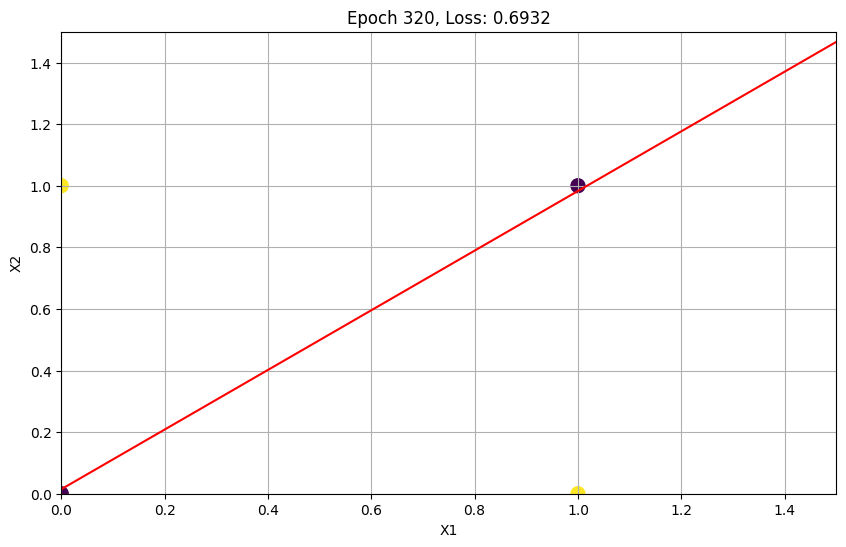

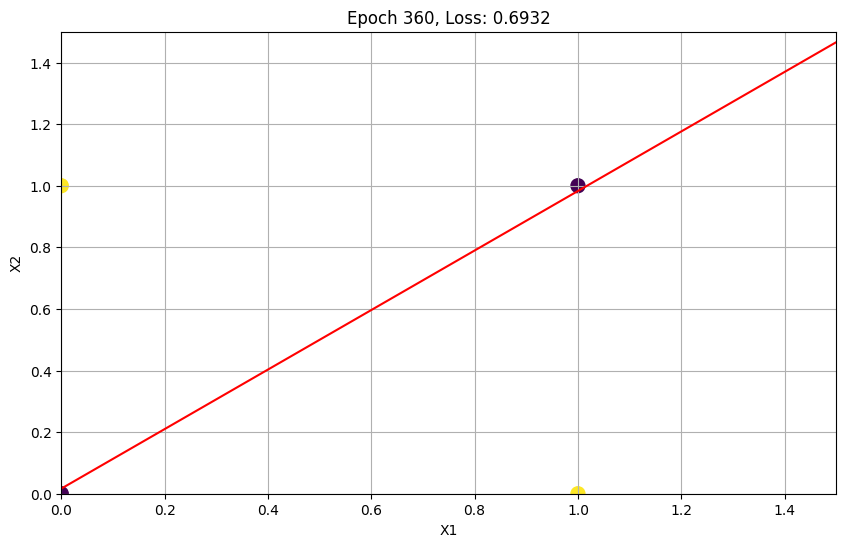

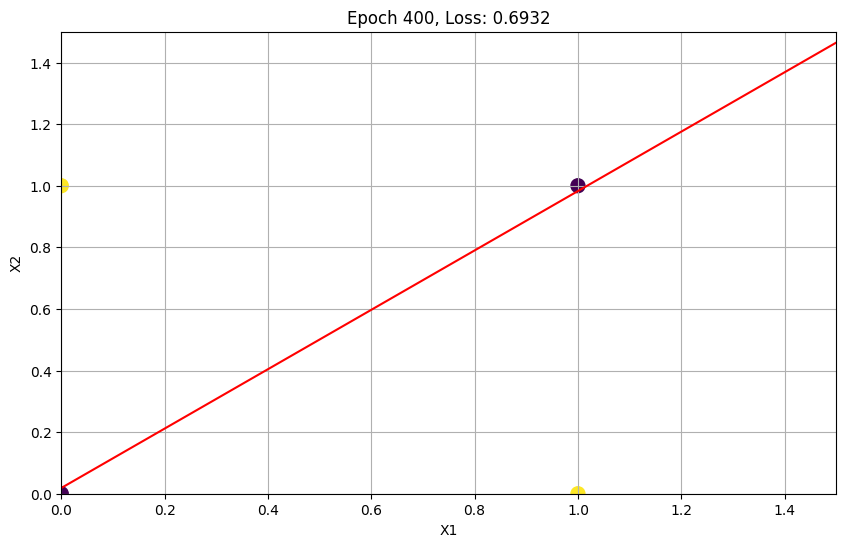

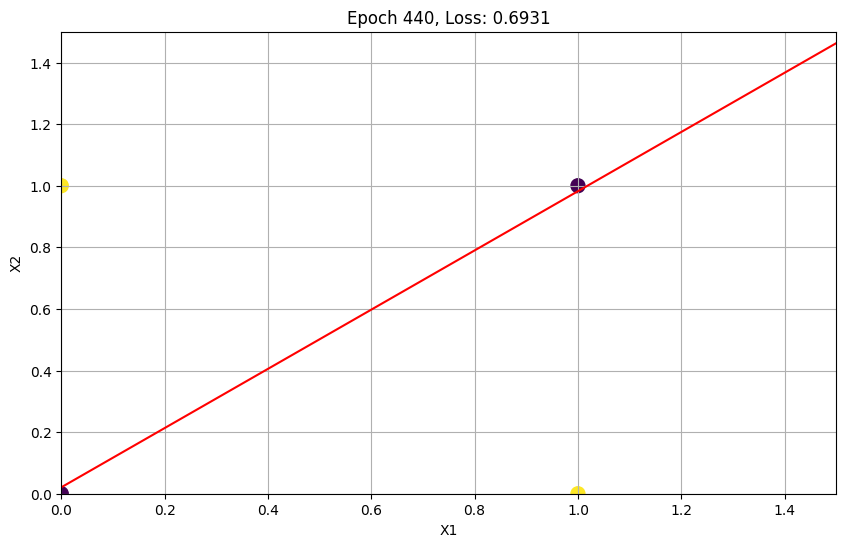

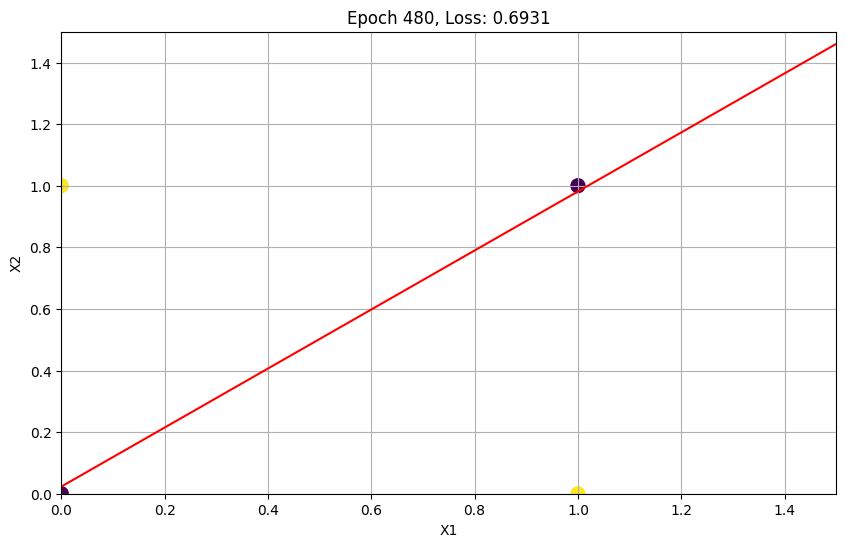

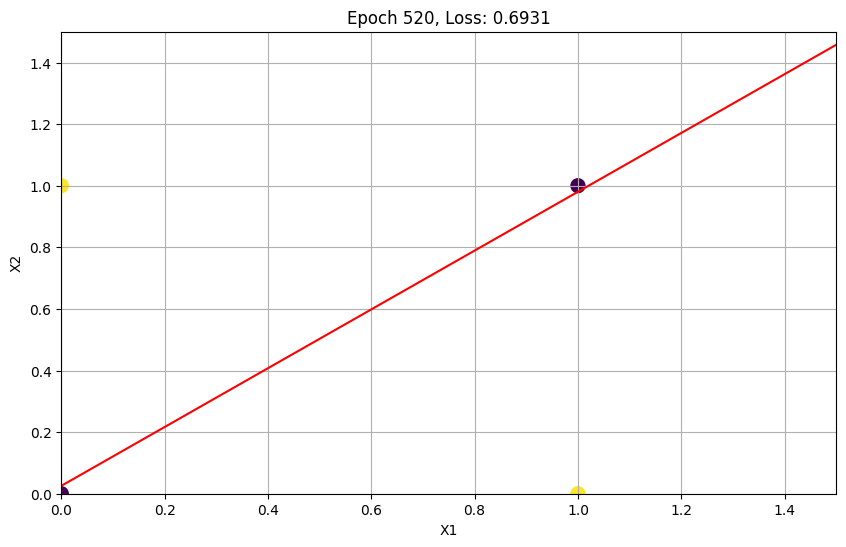

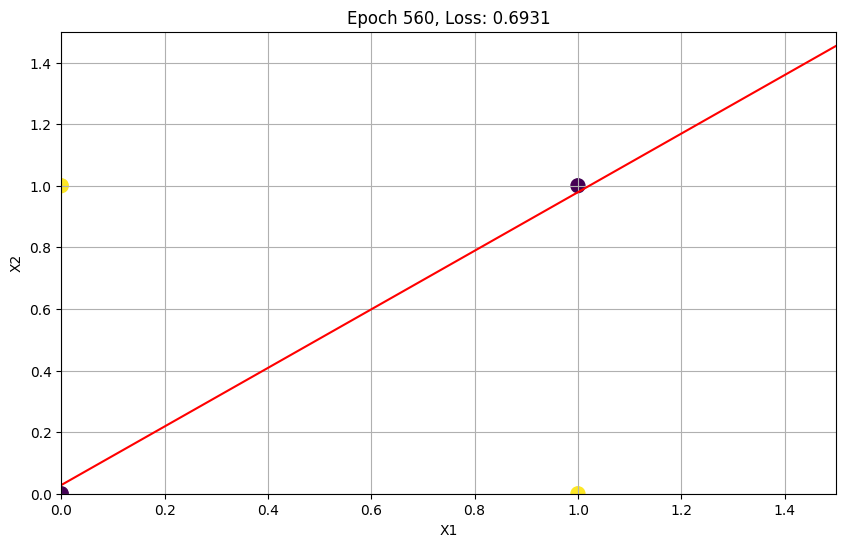

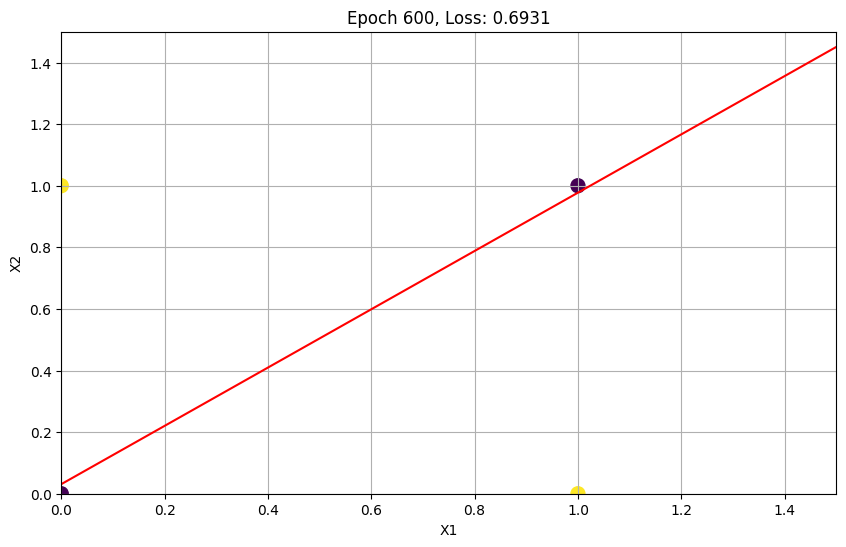

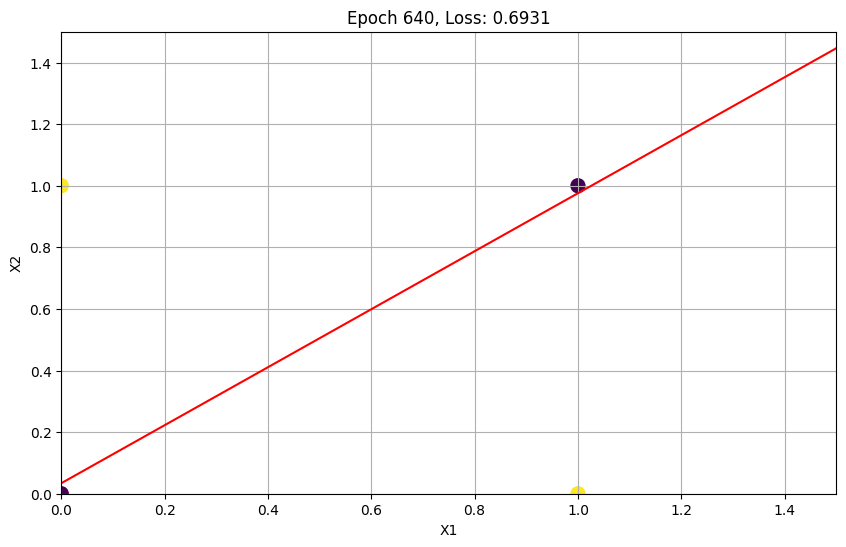

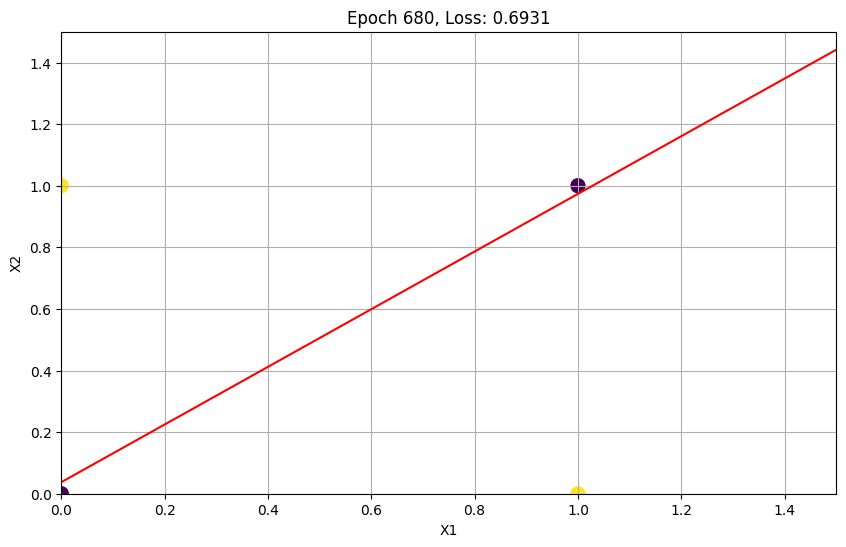

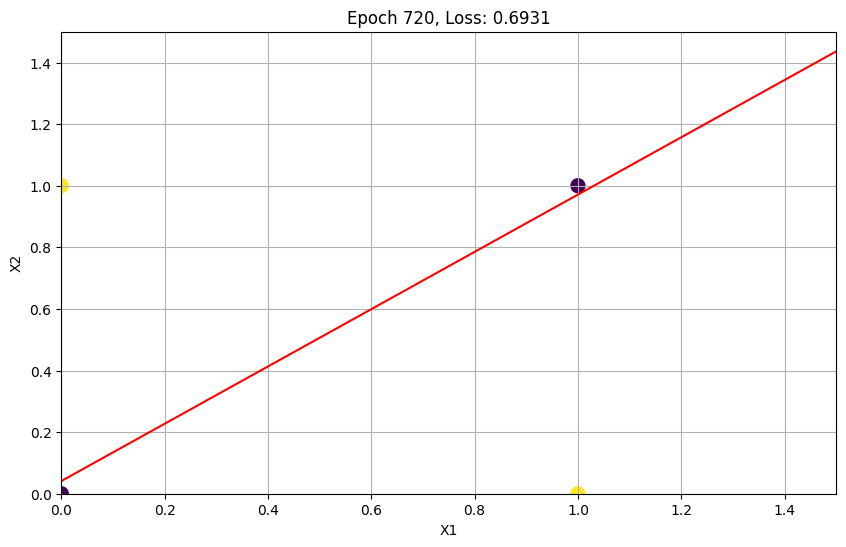

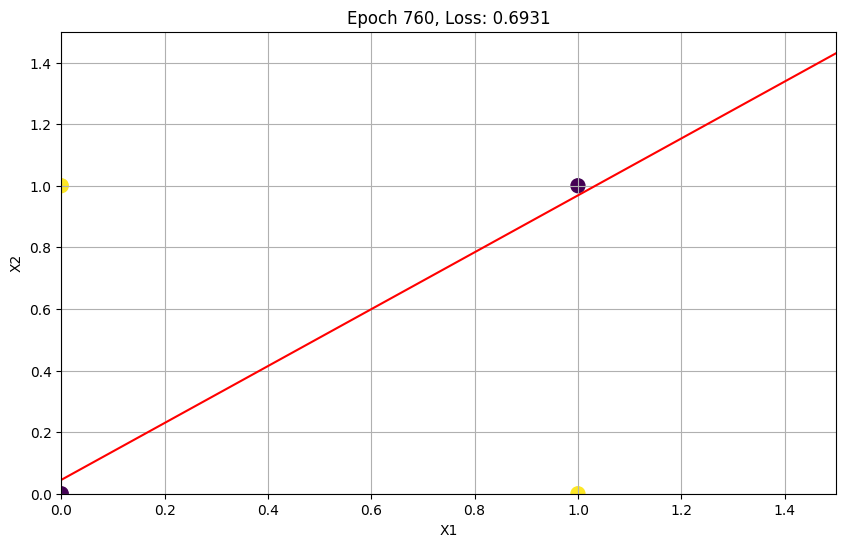

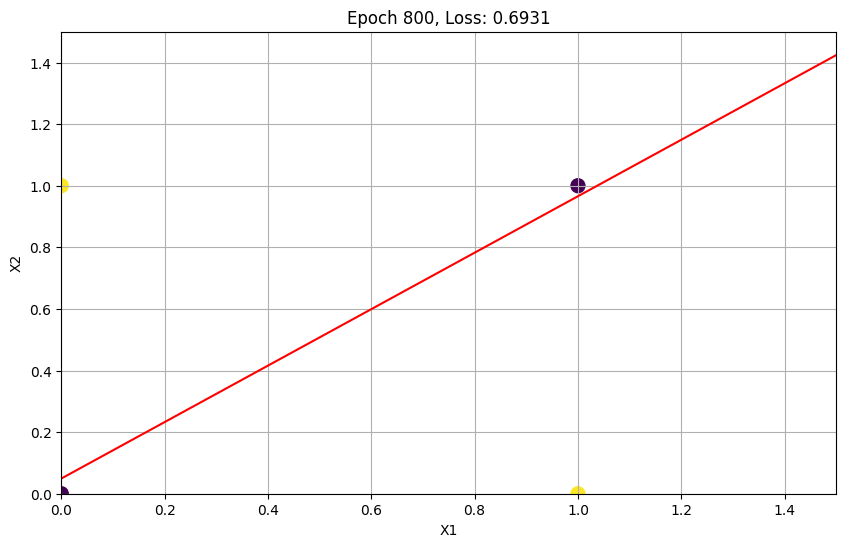

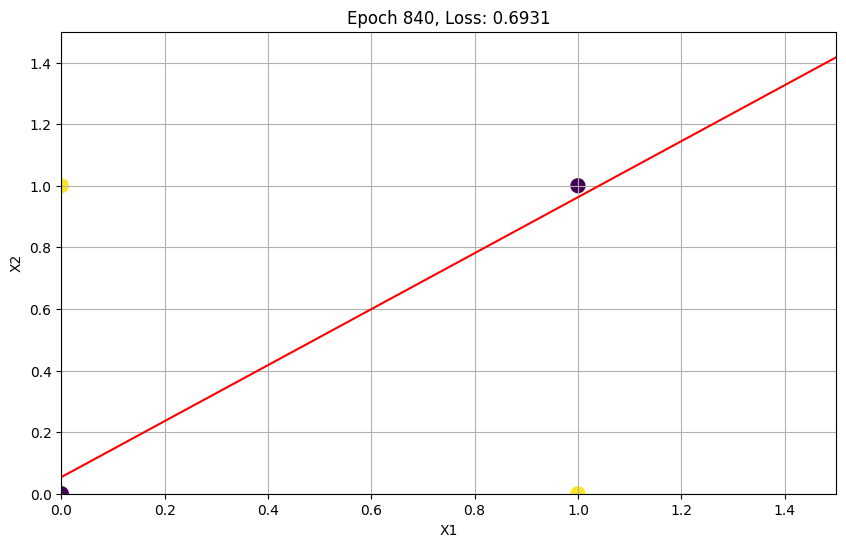

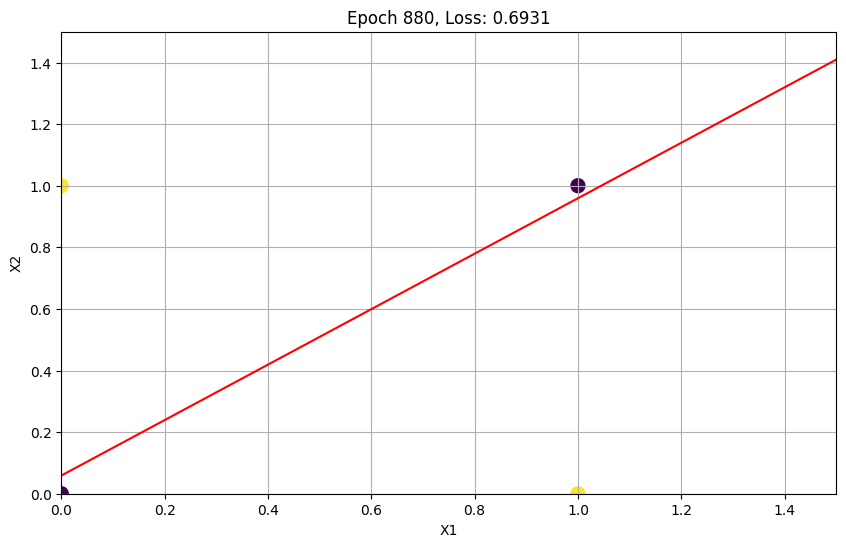

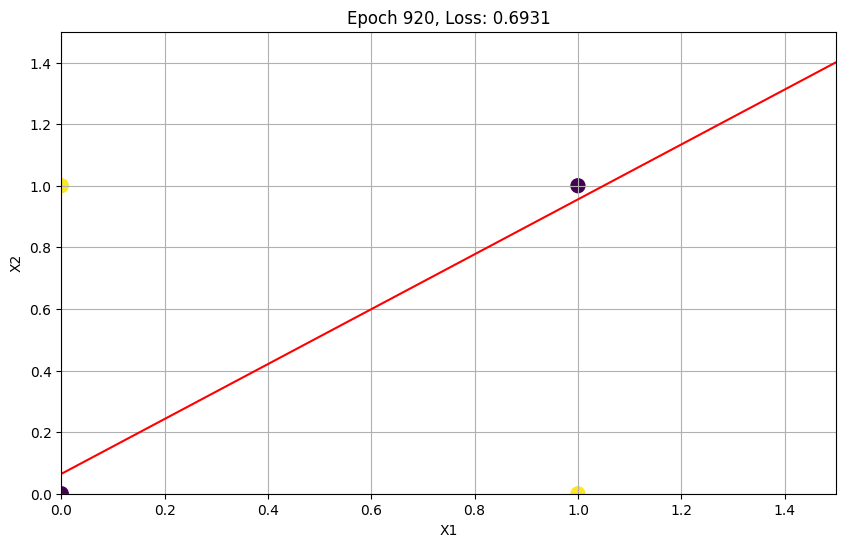

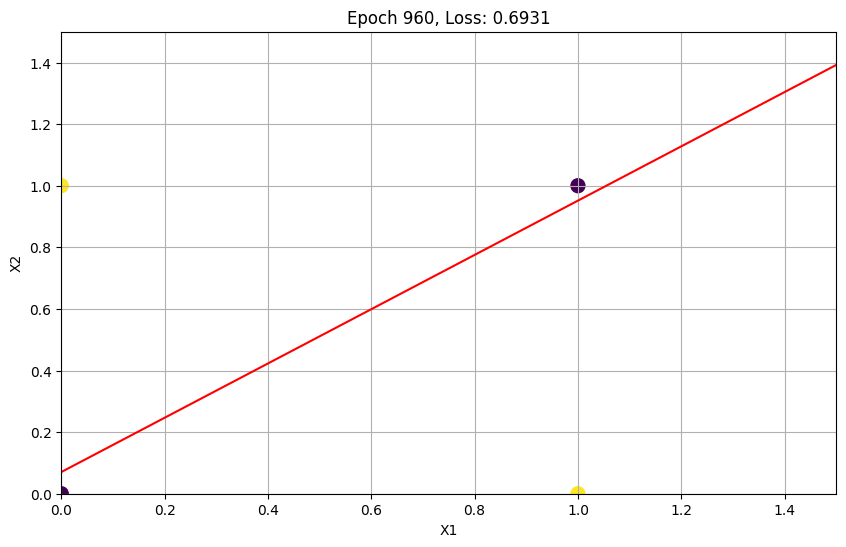

Final Weights: [[ 0.00016393]
 [-0.00018828]]
Final Bias: [1.44322632e-05]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the dataset (AND problem)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])  # AND logic

# Initialize weights and bias
W = np.random.rand(2, 1)
b = np.random.rand(1)

# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Visualization function
def visualize(X, y, W, b, epoch, loss):
    plt.figure(figsize=(10, 6))

    # Plotting the data points
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='viridis', s=100)

    # Getting the range of x values to plot the decision boundary
    x_values = np.linspace(0, 1.5, 100)
    y_values = - (W[0] * x_values + b) / W[1]

    plt.plot(x_values, y_values, "-r")

    plt.xlim([0, 1.5])
    plt.ylim([0, 1.5])
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f'Epoch {epoch}, Loss: {loss:.4f}')
    plt.grid(True)

    plt.show()

# Training parameters
learning_rate = 0.1  # Adjusted learning rate
epochs = 1000
display_frequency = 40  # Display the plot every display_frequency epochs

# Training loop
for epoch in range(epochs):
    # Forward propagation
    linear_output = np.dot(X, W) + b
    y_pred = sigmoid(linear_output)

    # Compute the loss
    loss = np.mean(-y * np.log(y_pred + 1e-10) - (1 - y) * np.log(1 - y_pred + 1e-10))  # Added small constant for numerical stability

    # Backward propagation
    d_loss = y_pred - y
    d_linear_output = d_loss * sigmoid_derivative(y_pred)
    W -= learning_rate * np.dot(X.T, d_linear_output)
    b -= learning_rate * np.sum(d_linear_output)

    # Visualize decision boundary every display_frequency epochs
    if epoch % display_frequency == 0:
        visualize(X, y, W, b, epoch, loss)

# Print final weights and bias
print(f'Final Weights: {W}')
print(f'Final Bias: {b}')

In [ ]:
X = np.array([1,1])
sigmoid(np.dot(X,W) + b)

array([0.76664601])

## Introduction to Deep Learning

Deep Learning is an extension of traditional neural networks which allows the handling of complex high-dimensional data by employing deep architectures with many layers. Two important types of deep neural networks are Convolutional Neural Networks (CNNs) and Recurrent Neural Networks (RNNs).

### Convolutional Neural Networks (CNNs)
CNNs are particularly suited for processing grid-like data, such as images.

**Key Components:**

* __Convolutional Layer__: Applies a convolution operation to the input, passing the result to the next layer.
* __Pooling Layer__: Downsamples the spatial dimensions of the input.
* __Fully Connected Layer__: Performs classification based on the features extracted by the previous layers.

__Basic CNN Architecture:__

Input -> Convolution -> Pooling -> Convolution -> Pooling -> Fully Connected -> Output

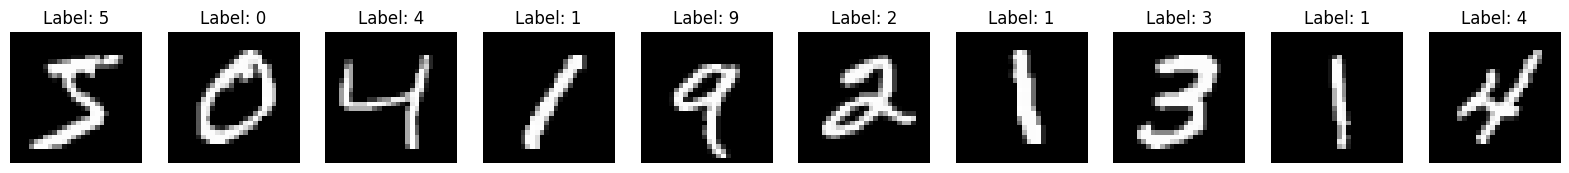

313/313 [==============================] - 2s 5ms/step


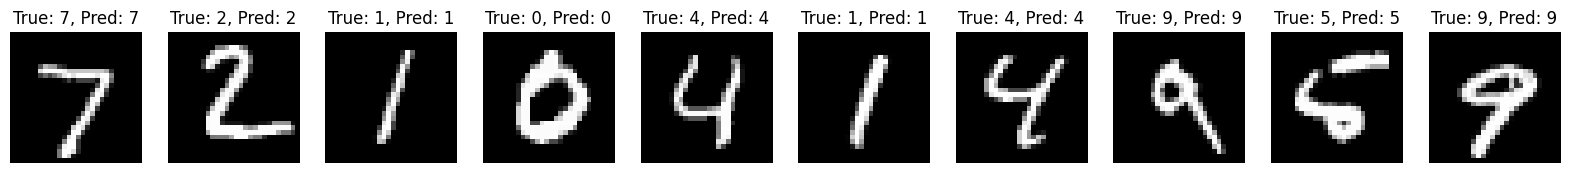

1/1 [==============================] - 0s 79ms/step


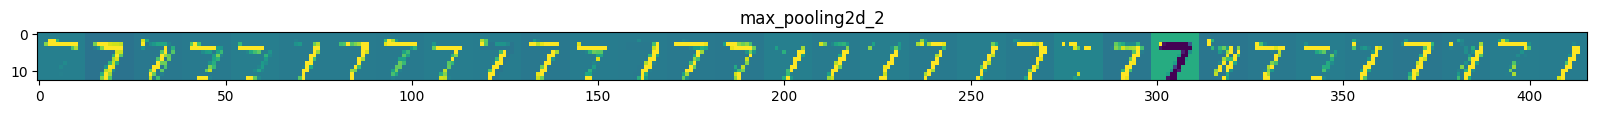

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

def visualize_data(images, labels, num_samples=10):
    figure, axes = plt.subplots(1, num_samples, figsize=(20, 20))
    for i, ax in enumerate(axes):
        ax.imshow(images[i].reshape(28, 28), cmap='gray')
        ax.set_title(f"Label: {labels[i]}")
        ax.axis('off')
    plt.show()

visualize_data(x_train, y_train)

# Normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Build the CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1)

def visualize_predictions(model, images, true_labels, num_samples=10):
    predictions = model.predict(images)
    pred_labels = np.argmax(predictions, axis=1)

    figure, axes = plt.subplots(1, num_samples, figsize=(20, 20))
    for i, ax in enumerate(axes):
        ax.imshow(images[i].reshape(28, 28), cmap='gray')
        ax.set_title(f"True: {true_labels[i]}, Pred: {pred_labels[i]}")
        ax.axis('off')
        if true_labels[i] != pred_labels[i]:
            ax.add_patch(plt.Rectangle((0, 0), 27, 27, edgecolor='red', facecolor='none'))
    plt.show()

visualize_predictions(model, x_test, y_test)

# 4. Visualize the activations of hidden layers.
from keras.models import Model

def visualize_activations(model, image):
    successives_outputs = [layer.output for layer in model.layers[1:]]  # all layer outputs except input
    visualization_model = Model(inputs=model.input, outputs=successives_outputs)

    x = image
    x = x.reshape(1, 28, 28, 1)
    feature_maps = visualization_model.predict(x)

    layer_names = [layer.name for layer in model.layers[1:]]

    for layer_name, feature_map in zip(layer_names, feature_maps):
        if len(feature_map.shape) == 4:  # Only conv / pooling layers
            n_features = feature_map.shape[-1]  # number of features in feature map
            size = feature_map.shape[1]  # feature map shape (1, size, size, n_features)
            display_grid = np.zeros((size, size * n_features))
            for i in range(n_features):
                x = feature_map[0, :, :, i]
                x -= x.mean()  # Post-processes the feature to make it visually palatable
                x /= x.std()
                x *= 64
                x += 128
                x = np.clip(x, 0, 255).astype('uint8')
                display_grid[:, i * size: (i + 1) * size] = x
            scale = 20. / n_features
            plt.figure(figsize=(scale * n_features, scale))
            plt.title(layer_name)
            plt.grid(False)
            plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.show()

image_to_visualize = x_test[0]
visualize_activations(model, image_to_visualize)

### Recurrent Neural Networks (RNNs)
RNNs are suitable for sequential data like time series or text.

**Key Components:**

* **Recurrent Layer**: Has loops to maintain information across time steps.
* **Output Layer**: Provides the result based on the features extracted by the recurrent layer.



Epoch 1/100
32/32 [==============================] - 2s 3ms/step - loss: 0.0013
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 2.5173e-05
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 3.3129e-06
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 8.3291e-07
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 3.6822e-07
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 2.1769e-07
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 1.7202e-07
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 1.2942e-07
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0008e-07
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 8.1527e-08
Epoch 11/100
32/32 [==============================] - 0s 3ms/step - loss: 7.4009e-08
Epoch 12/100
32/32 [==============================] - 0s 4ms/step - loss: 5.80

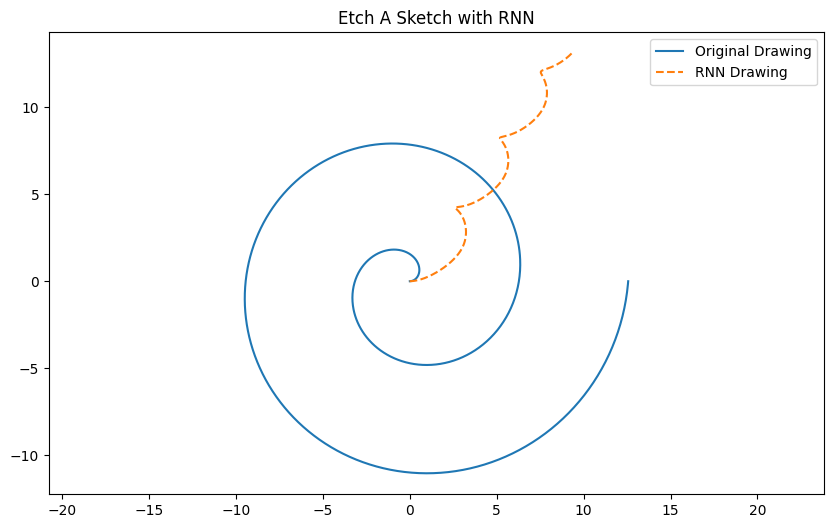

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# 1. Data Creation: Generate a spiral drawing
t = np.linspace(0, 4 * np.pi, 1000)  # Spiral with 4 turns
x = t * np.cos(t)
y = t * np.sin(t)

# Convert to relative movements (dx, dy) for the RNN
dx = np.diff(x)
dy = np.diff(y)
seq_data = np.column_stack((dx, dy))

# Prepare data for RNN
X = seq_data[:-1].reshape(-1, 1, 2)  # input: current (dx, dy)
y = seq_data[1:]                    # target: next (dx, dy)

# 2. Build the RNN
model = Sequential([
    SimpleRNN(128, activation='relu', return_sequences=True, input_shape=(1, 2)),
    SimpleRNN(64, activation='relu'),
    Dense(2, activation='linear')  # Regression to predict dx and dy
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=100, batch_size=32)

# 3. Visualization: Generate drawing from RNN
draw_length = 1000
drawing_rnn = np.zeros((draw_length, 2))
current_pos = np.array([[dx[0], dy[0]]])

for i in range(1, draw_length):
    next_step = model.predict(current_pos.reshape(1, 1, 2))
    drawing_rnn[i] = drawing_rnn[i-1] + next_step
    current_pos = next_step

# Plot the original drawing and RNN's drawing
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(dx), np.cumsum(dy), label='Original Drawing')
plt.plot(drawing_rnn[:, 0], drawing_rnn[:, 1], label='RNN Drawing', linestyle='dashed')
plt.axis('equal')
plt.legend()
plt.title('Etch A Sketch with RNN')
plt.show()


### Understanding Overfitting and Underfitting

__Overfitting:__ The model learns the detail and noise in the training data to the extent that it performs poorly on new data.

__Underfitting:__ The model cannot capture the underlying trend of the data.

__Mitigation:__

* __Regularization:__ Adds a penalty on the different parameters of the model to reduce the freedom of the model and avoid overfitting.
* __Dropout:__ Randomly sets a fraction of the input units to 0 during training, which helps prevent overfitting.

These components and concepts form the backbone of deep learning, enabling the development of complex models capable of handling a wide variety of tasks in vision, language, and beyond.

## Introduction to Natural Language Processing (NLP)

Natural Language Processing (NLP) is a subfield of AI that focuses on the interaction between humans and computers using natural language. The ultimate objective of NLP is to read, decipher, understand, and make sense of human languages in a manner valuable to applications like translation, sentiment analysis, and more.

### Text Preprocessing
Before feeding text data into a model, it's crucial to preprocess it. Common steps include:

* __Tokenization:__ Splitting text into words, phrases, symbols, or other meaningful elements called tokens.
* __Stemming:__ Reducing words to their root or stem.
* __Lemmatization:__ Similar to stemming but considers the context and part of speech.
* __Stopword Removal:__ Removing common words that don't carry much meaning.

In [ ]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.chunk import ne_chunk
from nltk.tag import pos_tag

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Example text
text = "Hello, how are you? I am fine, thank you. Apple Inc. is based in California. It's a sunny day."

# Tokenization
tokens = word_tokenize(text)
print(f'Tokens: {tokens}')

# Stemming
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(token) for token in tokens]
print(f'Stemmed Tokens: {stemmed_tokens}')

# Stopword Removal
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
print(f'Filtered Tokens: {filtered_tokens}')

# Named Entity Recognition
for sent in sent_tokenize(text):
    for chunk in ne_chunk(pos_tag(word_tokenize(sent))):
        if hasattr(chunk, 'label'):
            print(chunk.label(), ' '.join(c[0] for c in chunk))

# Part-of-Speech Tagging
pos_tags = pos_tag(tokens)
print(f'POS Tags: {pos_tags}')

# Simple Sentiment Analysis using VADER
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

analyzer = SentimentIntensityAnalyzer()
sentiments = analyzer.polarity_scores(text)
print(f'Sentiments: {sentiments}')

# Determining the sentiment based on compound score
if sentiments['compound'] > 0.05:
    print("Positive Sentiment")
elif sentiments['compound'] < -0.05:
    print("Negative Sentiment")
else:
    print("Neutral Sentiment")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


Tokens: ['Hello', ',', 'how', 'are', 'you', '?', 'I', 'am', 'fine', ',', 'thank', 'you', '.', 'Apple', 'Inc.', 'is', 'based', 'in', 'California', '.', 'It', "'s", 'a', 'sunny', 'day', '.']
Stemmed Tokens: ['hello', ',', 'how', 'are', 'you', '?', 'i', 'am', 'fine', ',', 'thank', 'you', '.', 'appl', 'inc.', 'is', 'base', 'in', 'california', '.', 'it', "'s", 'a', 'sunni', 'day', '.']
Filtered Tokens: ['Hello', ',', '?', 'fine', ',', 'thank', '.', 'Apple', 'Inc.', 'based', 'California', '.', "'s", 'sunny', 'day', '.']
GPE Hello
PERSON Apple
ORGANIZATION Inc.
GPE California
POS Tags: [('Hello', 'NNP'), (',', ','), ('how', 'WRB'), ('are', 'VBP'), ('you', 'PRP'), ('?', '.'), ('I', 'PRP'), ('am', 'VBP'), ('fine', 'JJ'), (',', ','), ('thank', 'NN'), ('you', 'PRP'), ('.', '.'), ('Apple', 'NNP'), ('Inc.', 'NNP'), ('is', 'VBZ'), ('based', 'VBN'), ('in', 'IN'), ('California', 'NNP'), ('.', '.'), ('It', 'PRP'), ("'s", 'VBZ'), ('a', 'DT'), ('sunny', 'JJ'), ('day', 'NN'), ('.', '.')]
Sentiments: {'neg

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


### Word Embeddings
Word embeddings are vector representations of words in a continuous vector space. Popular methods include Word2Vec and GloVe.

### Sequence Models: LSTM and GRU
Long Short-Term Memory (LSTM) and Gated Recurrent Units (GRU) are types of RNNs capable of learning long-term dependencies in data. Sentiment analysis is a common NLP task. Below is a simplistic example using Keras:

Epoch 1/3
782/782 [==============================] - 202s 255ms/step - loss: 0.4306 - accuracy: 0.7977 - val_loss: 0.4503 - val_accuracy: 0.8222
Epoch 2/3
782/782 [==============================] - 203s 260ms/step - loss: 0.2648 - accuracy: 0.8934 - val_loss: 0.3649 - val_accuracy: 0.8456
Epoch 3/3
782/782 [==============================] - 49s 62ms/step


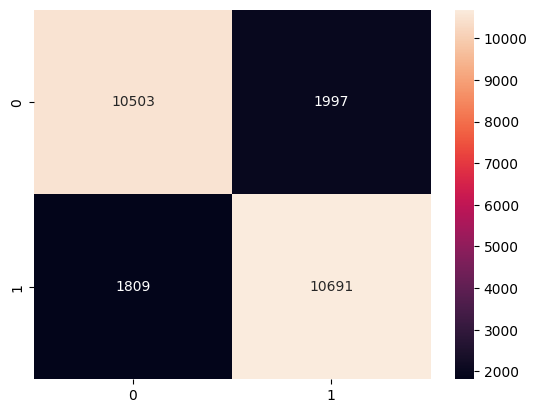

1/1 [==============================] - 0s 46ms/step
Positive review with confidence 80.24%


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.preprocessing import sequence
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
import numpy as np

# Load IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# Pad sequences
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

# Build the model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    LSTM(128),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3)

# Predictions
y_pred = (model.predict(x_test) > 0.5).astype("int32")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

# Function for user to input their own review
def classify_review(review):
    # Tokenizing and padding the review
    word_to_id = imdb.get_word_index()
    tokens = [word_to_id[word] for word in review.split() if word in word_to_id]
    tokens = sequence.pad_sequences([tokens], maxlen=100)

    # Predicting
    prediction = model.predict(tokens)
    if prediction > 0.5:
        print("Positive review with confidence {:.2f}%".format(prediction[0][0]*100))
    else:
        print("Negative review with confidence {:.2f}%".format((1 - prediction[0][0])*100))

# Example usage:
review = "The movie was fantastic! I really enjoyed it."
classify_review(review)

## Building a Simple Large-Language Model

In recent years, large language models like GPT-3 have shown impressive performance on a wide range of NLP tasks. These models are trained on extensive datasets and have a large number of parameters. In this section, we'll illustrate how to build a simpler version of such a model using Keras.

### Understanding Transformer Architecture
The transformer architecture, which underpins models like GPT-3, consists of an encoder and a decoder. However, GPT variants only use the decoder part. The key components are:

* __Self-Attention Mechanism:__ Allows each element in the input sequence to focus on different parts of the sequence, thereby capturing dependencies regardless of their distance in the sequence.
* __Feed-Forward Neural Network:__ Processes the output of the self-attention layer in a position-wise manner.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    res = x + inputs

    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

def build_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout=0, mlp_dropout=0):
    inputs = tf.keras.Input(shape=input_shape)
    x = layers.Embedding(input_dim=10000, output_dim=128, input_length=input_shape[0])(inputs)  # Adding Embedding layer
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D()(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)
    return tf.keras.Model(inputs, outputs)

# Now input_shape only needs to specify the sequence length
input_shape = (100,)

model = build_model(input_shape, head_size=128, num_heads=4, ff_dim=128, num_transformer_blocks=4, mlp_units=[128], mlp_dropout=0.4, dropout=0.25)
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=["accuracy"])
model.summary()

# Now you can train the model with your data
model.fit(x_train, y_train, epochs=1, validation_split=0.2)

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 embedding_3 (Embedding)     (None, 100, 128)             1280000   ['input_2[0][0]']             
                                                                                                  
 layer_normalization_8 (Lay  (None, 100, 128)             256       ['embedding_3[0][0]']         
 erNormalization)                                                                                 
                                                                                                  
 multi_head_attention_4 (Mu  (None, 100, 128)             263808    ['layer_normalization_8[

In this code:

* We define a transformer_encoder function to build a single transformer block.
* The build_model function stacks multiple transformer blocks and adds a classification head on top.
* We then compile and train the model using the training data.

### Exploring the Model's Performance
After training, you can use methods like `model.evaluate` and `model.predict` to assess the model's performance on unseen data and make predictions.

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Make predictions
predictions = model.predict(x_test)

## Building a Large-Language Model to Generate Text

### Simple Example using Keras

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
import numpy as np

In [ ]:
text = "In a quaint little town nestled between rolling hills and a meandering river, there existed a close-knit community of imaginative souls. The townspeople, known for their whimsical traditions and shared love for the arts, thrived in a culture steeped in creativity and camaraderie. Every year, as autumn painted the leaves with hues of gold and crimson, they hosted a grand festival that celebrated the boundless realms of imagination. The festival, a vibrant tapestry of music, dance, and storytelling, was a testament to the enduring spirit of community and the shared pursuit of artistic expression. It was during these cherished festivities that the heart of the town beat loudest, echoing the age-old adage that creativity, when nurtured and shared, has the power to unite people across all walks of life."
tokens = text.split()  # Simple whitespace tokenization
vocab = {word: i for i, word in enumerate(set(tokens))}
data = [vocab[word] for word in tokens]

In [ ]:
input_data = np.array(data[:-1])
output_data = np.array(data[1:])

In [ ]:
model = Sequential([
    Embedding(input_dim=len(vocab), output_dim=64, input_length=1),
    LSTM(128),
    Dense(len(vocab), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

In [ ]:
model.fit(input_data, output_data, epochs=100)

In [ ]:
def generate_text(seed_text, num_words):
    for _ in range(num_words):
        tokenized_text = [vocab[word] for word in seed_text.split()]
        predictions = model.predict(np.array(tokenized_text)[-1:])
        next_word_id = np.argmax(predictions, axis=-1)[0]
        for word, index in vocab.items():
            if index == next_word_id:
                seed_text += " " + word
                break
    return seed_text

print(generate_text("In", 25))

### More complex example - using OpenWebText

In [ ]:
!pip install datasets

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from datasets import load_dataset

# Load dataset
dataset = load_dataset('stas/openwebtext-10k', split='train[:1]')

# Preprocessing: For simplicity, let's truncate and pad texts to a fixed length
max_length = 128
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(dataset['text'])

def preprocess_texts(texts):
    tokenized = tokenizer.texts_to_sequences(texts)
    return tf.keras.preprocessing.sequence.pad_sequences(tokenized, maxlen=max_length)

x_train = preprocess_texts(dataset['text'])

# Define Transformer block
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.25):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

# Define Mini GPT model
class MiniGPT(keras.Model):
    def __init__(self, vocab_size, embed_dim, num_heads, ff_dim, num_transformer_blocks):
        super(MiniGPT, self).__init__()
        self.embedding = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.transformer_blocks = [TransformerBlock(embed_dim, num_heads, ff_dim) for _ in range(num_transformer_blocks)]
        self.fc = layers.Dense(vocab_size, activation='softmax')

    def call(self, inputs):
        x = self.embedding(inputs)
        for transformer_block in self.transformer_blocks:
            x = transformer_block(x)
        return self.fc(x)

    def generate(self, input_text, num_words, tokenizer, max_length):
        tokenized_input = tokenizer.texts_to_sequences([input_text])
        padded_input = tf.keras.preprocessing.sequence.pad_sequences(tokenized_input, maxlen=max_length-1)
        generated_text = input_text

        for _ in range(num_words):
            predictions = self.predict(padded_input)
            predicted_word_index = tf.argmax(predictions[0, -1]).numpy()
            predicted_word = tokenizer.sequences_to_texts([[predicted_word_index]])[0]
            generated_text += f' {predicted_word}'
            # Update the input text to include the predicted word
            padded_input = tf.keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([generated_text]), maxlen=max_length-1)

        return generated_text

# Instantiate and compile the model
vocab_size = len(tokenizer.word_index) + 1
embed_dim = 32  # for simplicity
num_heads = 2  # for simplicity
ff_dim = 32  # for simplicity
num_transformer_blocks = 2  # for simplicity

model = MiniGPT(vocab_size, embed_dim, num_heads, ff_dim, num_transformer_blocks)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

# Prepare the labels (we'll predict the next word at each time step)
y_train = x_train[:, 1:]
x_train = x_train[:, :-1]

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=3)

# Run the model on some example text
example_text = "Once upon a time"
tokenized_example = tokenizer.texts_to_sequences([example_text])
padded_example = tf.keras.preprocessing.sequence.pad_sequences(tokenized_example, maxlen=max_length-1)
predictions = model.predict(padded_example)

# Get the predicted word
predicted_word_index = tf.argmax(predictions[0, -1]).numpy()
predicted_word = tokenizer.sequences_to_texts([[predicted_word_index]])[0]
print(f'Continuation: {example_text} {predicted_word}')

# After training the model, use it to generate text
num_words_to_generate = 10
generated_text = model.generate("Once upon a time", num_words_to_generate, tokenizer, max_length)
print(f'Generated text: {generated_text}')


## Using a pre-trained GPT-2 model

In [ ]:
!pip install transformers[torch]

In [ ]:
from datasets import load_dataset
from transformers import GPT2Tokenizer, GPT2LMHeadModel, TextDataset, DataCollatorForLanguageModeling
from transformers import Trainer, TrainingArguments

# Load the dataset
dataset = load_dataset('stas/openwebtext-10k', split='train[:1]')

# Tokenization
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token
tokenized_dataset = dataset.map(lambda examples: tokenizer(examples['text'], truncation=True), batched=True)

# Prepare the dataset for training
train_dataset = tokenized_dataset
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

# Load the pre-trained GPT-2 model
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    overwrite_output_dir=True,
    num_train_epochs=1,  # For demonstration purposes
    per_device_train_batch_size=4,
    save_steps=10_000,
    save_total_limit=2,
)

# Training
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
)

trainer.train()

In [ ]:
# Text generation
prompt = "My name is Shaun"
generated = model.generate(tokenizer.encode(prompt, return_tensors='pt'), max_length=150, num_beams=5, no_repeat_ngram_size=2, early_stopping=True)
generated_text = tokenizer.decode(generated[0], skip_special_tokens=True)
print(generated_text)